In [1]:
import pandas as pd
import expy
import ipywidgets as widgets
from expy import Experiment
from IPython.display import Markdown as md
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
%matplotlib ipympl
plt.style.use("mystyle-jupyter")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


### Loading experiment 

In [2]:
file = "exp_sample.json"

In [3]:
ex = expy.read(file)
title = ex.name if ex.name else "Experiment"

WARNING! Spot3_G_P11 does not contain any functions. Ignored when creating the function table
WARNING! Spot3_G_P11 does not contain any functions. Ignored when creating the function table


In [4]:
md(f"# {title}")

# Experiment

In [5]:
show = True
if show:
    display(md(filename=("LabNotes.md")))

## Laboratory notes
Insert here all the relevant laboratory notes.

## General summary

General attributes belonging to the events

In [6]:
attributes = ex.get_attributes()
print(attributes)

      T1 T2  Pid          P
0  Spot3  G  P17  11.310532
1  Spot3  G  P11   6.397365
2  Spot3  G  P14   7.915588
3  Spot3  G  P16  10.022278
4  Spot3  G  P13   7.279942
5  Spot3  G  P15   8.981847
6  Spot3  G  P12   6.709786


Here are the fitted parameters of our experiment:

In [7]:
show = False
if show: 
    print(ex)

In [8]:
show = True
df = ex.functions_flat
if show: 
    display(df)

name     T1   T2  Pid          P   VoigtA                    \
                                             Center   Height     Area   
0  Spot3_G_P17  Spot3    G  P17  11.310532  1618.74  782.518  65071.4   
1          NaN    NaN  NaN  NaN        NaN      NaN      NaN      NaN   
2  Spot3_G_P14  Spot3    G  P14   7.915588  1598.38  791.027  67760.6   
3  Spot3_G_P16  Spot3    G  P16  10.022278  1627.09  572.353  46004.5   
4  Spot3_G_P13  Spot3    G  P13   7.279942      NaN      NaN      NaN   
5  Spot3_G_P15  Spot3    G  P15   8.981847  1616.88 -744.985 -64662.6   
6  Spot3_G_P12  Spot3    G  P12   6.709786      NaN      NaN      NaN   

                                                                          \
       FWHM       a0   err_a0       a1    err_a1         a2       err_a2   
0  67.21550  65071.4  450.053  1618.74  0.154970  31.557500     0.658139   
1       NaN      NaN      NaN      NaN       NaN        NaN          NaN   
2  68.31620  67760.6  415.053  1598.38  0.145700  31.167100     0.618165   
3  55.57880  46004.5  349.747  1627.09  0.168242  15.561900     0.989966   
4       NaN      NaN      NaN      NaN       NaN        NaN          NaN   
5  -3.82372 -64662.6  399.307  1616.88  0.183974  -0.025197  1501.460000   
6       NaN      NaN      NaN      NaN       NaN        NaN          NaN   

                             LorentzianA                                       \
            a3        err_a3      Center    Height     Area     FWHM       a0   
0     0.396877  2.668430e-02         NaN       NaN      NaN      NaN      NaN   
1          NaN           NaN         NaN       NaN      NaN      NaN      NaN   
2     0.445219  2.559690e-02         NaN       NaN      NaN      NaN      NaN   
3     1.375720  1.207700e-01         NaN       NaN      NaN      NaN      NaN   
4          NaN           NaN     1600.32   954.721  74206.2  49.4816  74206.2   
5 -1096.510000  6.534090e+07         NaN       NaN      NaN      NaN      NaN   
6          NaN           NaN     1600.30  1148.200  68799.2  38.1457  68799.2   

                                                  
    err_a0       a1    err_a1       a2    err_a2  
0      NaN      NaN       NaN      NaN       NaN  
1      NaN      NaN       NaN      NaN       NaN  
2      NaN      NaN       NaN      NaN       NaN  
3      NaN      NaN       NaN      NaN       NaN  
4  385.810  1600.32  0.140186  24.7408  0.188786  
5      NaN      NaN       NaN      NaN       NaN  
6  330.489  1600.30  0.101524  19.0729  0.134752

### Functions 

Here is a list of all the functions used in the fitting process:

In [9]:
functions = sorted(set(ex.functions.fname)) 
print(*functions, sep = ", ")

LorentzianA, VoigtA


## Plots

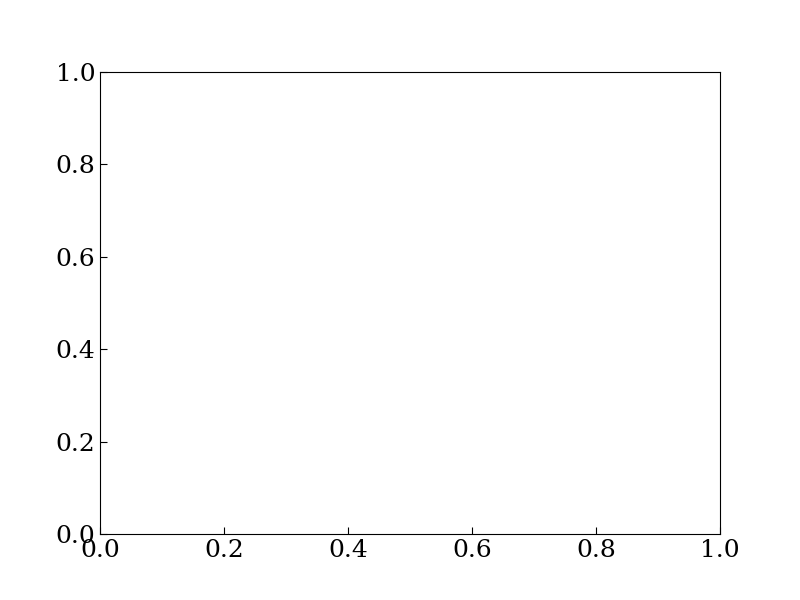

In [10]:
# Initialize plot
fig, ax = plt.subplots()

In [11]:
# set up labels
xlabel = "x"
ylabel = "I (a.u.)"

# chose line colors
y_plot = {"pos":[".k"], "ms":2}
ftot_plot = {"pos":["-r"]}
other_plot = {"_rem":{"pos":["-"],"c":[0,.3957,.6043], "alpha":.3}}

# plot labels
plabels_format = ".2f"


In [12]:
xlims = widgets.IntRangeSlider(value=[0, 3000], min=0, max=3000,step=1)
factor = widgets.FloatSlider(value=1, step=1, min=0, max=10)
to_plot = widgets.SelectMultiple(options=["y", "ftot"] + functions, description='What to plot')
func_validator = widgets.widgets.Checkbox(value=False, description='Select functions?')
bg = widgets.SelectMultiple(options=functions, description='Bg functions')
bg_validator = widgets.widgets.Checkbox(value=True, description='Substract bg?')
norm = widgets.Dropdown(value="y", options=["none", "y", "ftot"]+functions, description='Normalization')
sort = widgets.Dropdown(value="none", options=["none"]+list(attributes.columns), description='Sort by')
reverse = widgets.widgets.Checkbox(value=False, description='Reverse')
labels = widgets.Dropdown(value="none", options=["none"]+list(attributes.columns), description='Labels')
labelsx = widgets.FloatSlider(value=1.05, step=.05, min=-1.2, max=1.2, description='Labels x')
labelsy = widgets.FloatSlider(value=0, step=.1, min=0, max=5, description='Labels y')


# initialize plot
expy.plot_stack(ex, ax = ax)
ax.set(xlabel = xlabel, ylabel = ylabel, yticks=[])
fig.tight_layout()

@interact_manual(
    to_plot=to_plot,
    func_validator=func_validator,
    norm=norm,
    sort=sort,
    reverse=reverse,
    labels=labels,
    labelsx=labelsx,
    labelsy=labelsy,
    bg_fun=bg,
    bg_validator=bg_validator,
    xlim=xlims, 
    ylim = "df.y.max()*2",
    factor = factor, 
)
def plot_stack(**args):
    funcs = list(args.pop("to_plot"))
    if args.pop("func_validator"):
        to_plot.layout.visibility = "visible"
        if("y" in funcs): 
            yp = y_plot
            funcs.remove("y")
        else:
            yp = None
        if("ftot" in funcs): 
            ftotp = ftot_plot
            funcs.remove("ftot")
        else:
            ftotp = None
        op = {f:other_plot["_rem"] for f in funcs}
    else:
        to_plot.layout.visibility = "hidden"
        yp = y_plot
        ftotp = ftot_plot
        op = other_plot

    bg_pattern = "|".join(args.pop("bg_fun"))
    if args.pop("bg_validator"):
        bg.layout.visibility = "visible"
    else:
        bg.layout.visibility = "hidden"
        bg_pattern = None
    
    if((norm:=args.pop("norm")) == "none"):
        norm = None
    else:
        norm = {"ref":norm, "exclude":"x"}

    if((sort:=args.pop("sort")) == "none"):
        fsort = None
    else:
        fsort = lambda x:x[1].attributes[sort]

    if((labs:=args.pop("labels")) != "none"):
        labelsx.layout.visibility = "visible"
        labelsy.layout.visibility = "visible"
    else:
        labs = None
        labelsx.layout.visibility = "hidden"
        labelsy.layout.visibility = "hidden"
        

    
    ax.cla()
    expy.plot_stack(
        ex, 
        ax = ax, 
        y_plot=yp,
        ftot_plot=ftotp,
        other_plot=op,
        bg_pattern=bg_pattern, 
        to_background = None, 
        normalized=norm,
        sort=fsort,
        labels=labs,
        labels_format=plabels_format,
        xlabels=args.pop("labelsx"),
        ylabels_shift=args.pop("labelsy"),
        **args
    )
    ax.set(xlabel = xlabel, ylabel = ylabel)
    fig.tight_layout()
    



interactive(children=(SelectMultiple(description='What to plot', options=('y', 'ftot', 'LorentzianA', 'VoigtA'…

In [13]:
# plt.close("all")